<a href="https://colab.research.google.com/github/AdolfoBanchio/Redes-neuronales-2024/blob/main/guias_ejercicios/redes_neuronales_2024_guia_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{align*}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{align*}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{align*}
V(t) \to E
\end{align*}

cuando

\begin{align*}
V(t) > V_u
\end{align*}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

## Unidades

* p = pico = $10^{-12}$
* n = nano = $10^{-9}$
* $\mu$ = micro = $10^{-6}$
* m = mili = $10^{-3}$
* ...
* k = kilo = $10^{3}$
* M = Mega = $10^{6}$
* G = Giga = $10^{9}$
* T = Tera = $10^{12}$

### Ley de Ohm

Si $\Omega$ = Ohmio, V = Voltio y A = Amper, entonces

$$ 1\, Ohm = 1 \Omega = \frac{1 V}{1 A} $$

### Ley RC

Si s = segundos y F = Faradios, entonces

$$ 1 s = 1 \Omega \times 1 F $$

### Hertz

Si Hz = Hertz, luego

$$ 1 Hz = \frac{1}{1 s} $$

### Referencias

* https://technologystudent.com/elec1/ohm1.htm

* https://en.wikipedia.org/wiki/Biological_neuron_model#Leaky_integrate-and-fire

* https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html



## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [5]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [6]:
# 1.2)
#import ode

def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)

def rk4(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.

    Argumentos de entrada:

        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Runge-Kutta de orden 4.

    # Ejemplos:
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x+h*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

En lo que sigue, se considera desactivado el mecanismo de disparo.

**1)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

**2)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

**3)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

**4)** Repita **1)**, **2)** y **3)** para el caso de corriente de entrada constante, $I=2nA$.

### Extra

**5)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

In [7]:
# 2.1)

Partimos de la ODE para $I=0$

$$
\begin{align*}
\frac{dV}{dt} &= \frac{1}{\tau}\left( E-V(t)+ RI(t) \right) \\
\frac{dV}{dt} &= \frac{1}{\tau}\left( E-V(t) \right) \\
\frac{dV}{E-V(t)} &= \frac{1}{\tau}dt \\
\text{Integro ambos lados} \\
\int \frac{dV}{E-V(t)} &= \int \frac{1}{\tau}dt \\
-\ln|E-V(t)| &= \frac{t}{\tau} + C \\
\ln|E-V(t)| &= -\frac{t}{\tau} + C \\
E-V(t) &= e^{-\frac{t}{\tau} + C} = e^{-\frac{t}{\tau}}e^C \\
\textrm{Sea } C_1 &= e^C \textrm{, entonces } \\
E-V(t) &= C_1e^{-\frac{t}{\tau}} \\

\text{Aplico las condiciones iniciales para }& t=0,V(0)=V_0 \\
E-V_0 &= C_1e^0 \rightarrow C_1 = E - V_0\\
\text{Entonces la solucion es:} \\
V(t) &= E - (E - V_0)e^{-\frac{t}{\tau}} \\
\end{align*}
$$

In [9]:
# 2.2) Graficar solución de la ecuación diferencial para v0 = 10 y t in [0,100]
def ode_sol(t,v0):
    """ 
    Solucion analitica para la  ODE 
    dV/dt = 1/tao (E - V + R*I)
    con condicion inicial
    V(0) = v0 
    I = 0

    Los valores las constantes son:
    E = -65mV
    tao = 10ms
    """
    E = -65
    tao = 10
    return E - (E-v0)*np.exp(-t/tao)

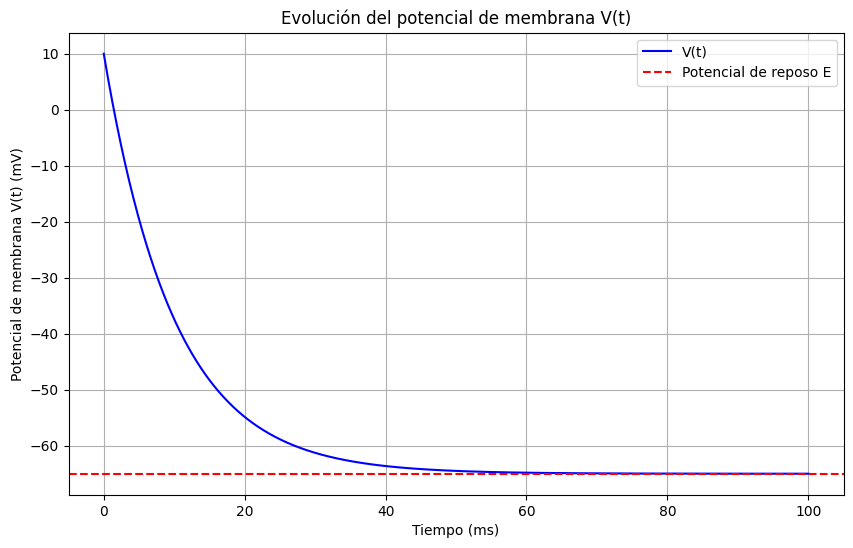

In [15]:
t = np.linspace(0,100,1000)
v0 = 10
plt.figure(figsize=(10, 6))
plt.plot(t, ode_sol(t,v0), label='V(t)', color='b')
plt.axhline(y=-65, color='r', linestyle='--', label='Potencial de reposo E')
plt.title('Evolución del potencial de membrana V(t)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana V(t) (mV)')
plt.legend()
plt.grid(True)
plt.show()

2.3)
En este lo que voy a haer va a ser calcular el valor de la ecuacion diferencial, para los diferentes valores que veo que toma la variable V(t) (por el ejercicio anterior veo que vive entre 10 y -70). 

Voy a graficar dV/dt en funcion de V(t).
Por la forma de la ODE
$$\frac{dV}{dt} = \frac{1}{\tau}\left( E-V(t) \right) \\$$

Es facil ver que el unico punto fijo (es decir cuando la razon de cambio es nula) es cuando V(t) = E.

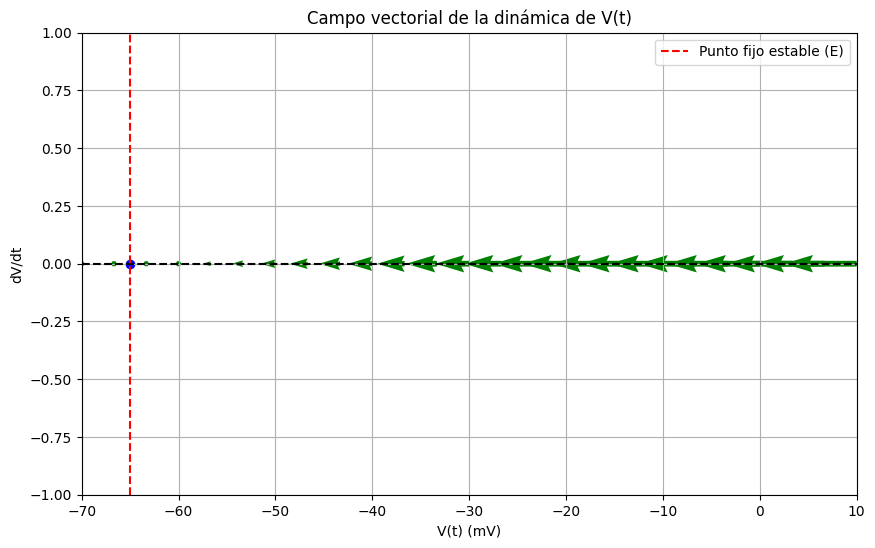

In [47]:
# Campo vectorial
V_values = np.linspace(-70, 10, 25)  # Valores de V(t) para el campo vectorial
dV_dt = (-65 - V_values) / 10  # Derivada de V(t) respecto a t

# Graficar el campo vectorial
plt.figure(figsize=(10, 6))
plt.quiver(V_values, np.zeros_like(V_values), dV_dt, np.zeros_like(dV_dt), angles='xy', scale_units='xy', scale=1, color='g')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=-65, color='r', linestyle='--', label='Punto fijo estable (E)')
plt.scatter(-65, 0, color='b')
# Configuración de la gráfica
plt.title('Campo vectorial de la dinámica de V(t)')
plt.xlabel('V(t) (mV)')
plt.ylabel('dV/dt')
plt.xlim([-70, 10])
plt.ylim([-1, 1])
plt.grid(True)
plt.legend()
plt.show()

## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**1)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

**2)** Grafique la solución computada en el inciso **3.1)**. Incorpore al gráfico la solución exacta del inciso **2.1)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.1)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$, donde $V^*$ es el valor de $V$ tal que $f(V)=0$.

**3)** Para el caso indicado en el inciso **3.1)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **3.2)**.
Grafíque la frencuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?


**4)** Repita **3.1)** y **3.2)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

**5)** Repita **3.1)** y **3.2)** con

\begin{equation}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [8]:
# 3.1)